
### Problem 2:

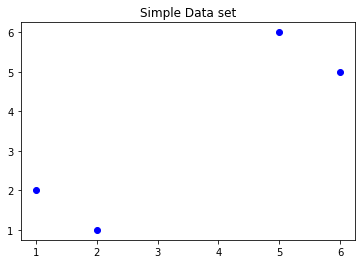

In [418]:
import numpy as np 
import matplotlib.pyplot as plt

data = np.array([[1,2],[2,1],[5,6],[6,5]])
for datapoint in data:
    plt.scatter(datapoint[0],datapoint[1], color='blue')
plt.title("Simple Data set")
plt.show()

In [419]:
def assignSite(xi, sites):
    s1 = sites[0]
    s_star = s1
    s_index = 0
    for i in range(sites.shape[0]):
        newDistance = sites[i] - xi
        normNewDistance = np.sqrt(newDistance[0]**2 + newDistance[1]**2)
        starDistance = s_star - xi
        normStarDistance = np.sqrt(starDistance[0]**2 + starDistance[1]**2)
        if normNewDistance < normStarDistance:
            s_star = sites[i]
            s_index = i

    return s_star, s_index

In [420]:
def calculateCost(S, clusters):
    cost = 0
    for j in range(0,S.shape[0]):
        for i in range(0,len(clusters[j])):
            dist = clusters[j][i] - S[j]
            cost += (dist[0]**2 + dist[1]**2)
            
    return cost

In [421]:
def k_means(S, data):

    for t in range(0,10):
        clusters = []
        for k in range(0,S.shape[0]):
            clusters.append([])
        for datapoint in data:
            _, s_index = assignSite(datapoint, S)
            #print(f"iteration: {k}")
            #print(f"datapoint {datapoint} assigned to site: {site}")
            clusters[s_index].append(datapoint)
        for j in range(0,S.shape[0]):
            update = 0
            for i in range (0,len(clusters[j])):
                update += clusters[j][i]
            S[j] = update / len(clusters[j])
            #print(f"Updated S: {S}")

    return S, clusters

Example of four points in $\mathbb{R}^2$ with set S of k=2 sites where Lloyd's algorithm converges. 

In [422]:
sData = data.copy()
SubOptimalS = np.array([[3,4], [4,3]])
print(f"Initial sites: {SubOptimalS}")
SubOptimalS, sClusters = k_means(SubOptimalS, sData)
print("Final S: ",SubOptimalS)
cost = calculateCost(SubOptimalS, sClusters)
print(f"Cost of S: {cost}")

Initial sites: [[3 4]
 [4 3]]
Final S:  [[3 4]
 [4 3]]
Cost of S: 32


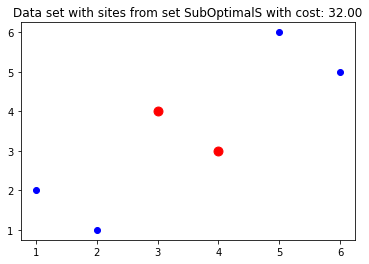

In [423]:
for datapoint in data:
    plt.scatter(datapoint[0],datapoint[1], color='blue')
for s in SubOptimalS:
    plt.scatter(s[0],s[1], color='red', s=80)
plt.title("Data set with sites from set SubOptimalS with cost: {0:.2f}".format(cost))
plt.show()

Exmaple of same four points in $\mathbb{R}^2$ with another set SPrime of k=2 sites where Lloyd's algorithm converges but has a cost less than that of S.

In [424]:
primeData = data.copy()
SPrime = np.array([primeData[0], primeData[2]])
print(f"Initial sites: {SPrime}")
SPrime, primeClusters = k_means(SPrime, primeData)
print("Final S: ",SPrime)
cost = calculateCost(SPrime, primeClusters)
print(f"Cost of sPrime: {cost}")

Initial sites: [[1 2]
 [5 6]]
Final S:  [[1 1]
 [5 5]]
Cost of sPrime: 4


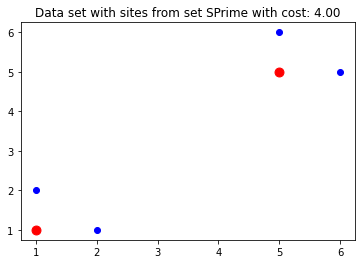

In [425]:
for datapoint in data:
    plt.scatter(datapoint[0],datapoint[1], color='blue')
for s in SPrime:
    plt.scatter(s[0],s[1],color='red', s=80)
plt.title("Data set with sites from set SPrime with cost: {0:.2f}".format(cost))
plt.show()

We see that Cost(SPrime, (X,y)) < Cost(S, (X,y)) with both having converged. Lloyd's algorithm is not deterministic. Depending on your initialization you will have different results which do no guarantee the optimal solution. 